In [2]:
!pip install --upgrade tensorflow tensorflow-datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.M9JXEQ_2.0.0/patch_camelyon-test.tfrecord*...:  …

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.M9JXEQ_2.0.0/patch_camelyon-train.tfrecord*...: …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.M9JXEQ_2.0.0/patch_camelyon-validation.tfrecord*…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.
Dataset Info:
tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shap

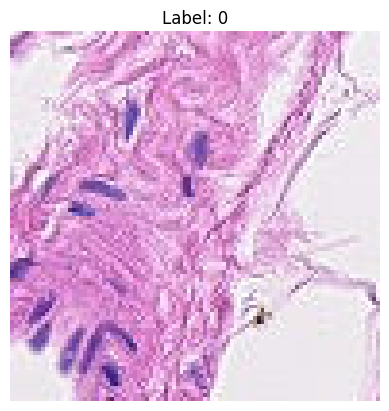

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Enable memory growth for GPUs (avoid crashes)
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PatchCamelyon dataset efficiently
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify loaded dataset
print(f"Dataset Info:\n{ds_info}")

# Example: view a sample image
import matplotlib.pyplot as plt

def show_sample(image, label):
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')

for image, label in ds_train.take(1):
    show_sample(image, label)


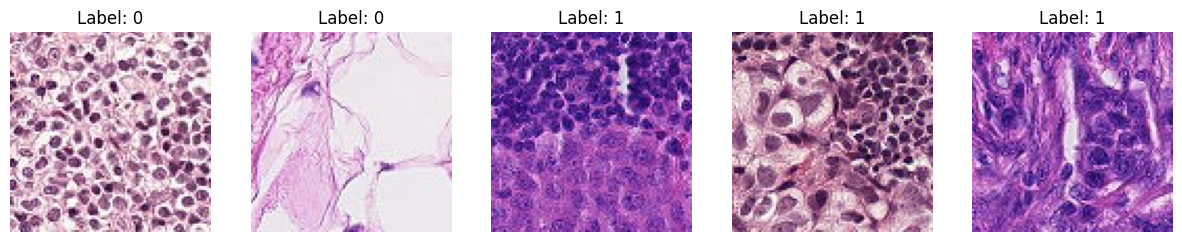

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
ds_train, ds_info = tfds.load('patch_camelyon', split='train', with_info=True, as_supervised=True)

# Display 5 sample images with labels
plt.figure(figsize=(15, 3))
for i, (image, label) in enumerate(ds_train.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.show()


tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(96, 96, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    dis

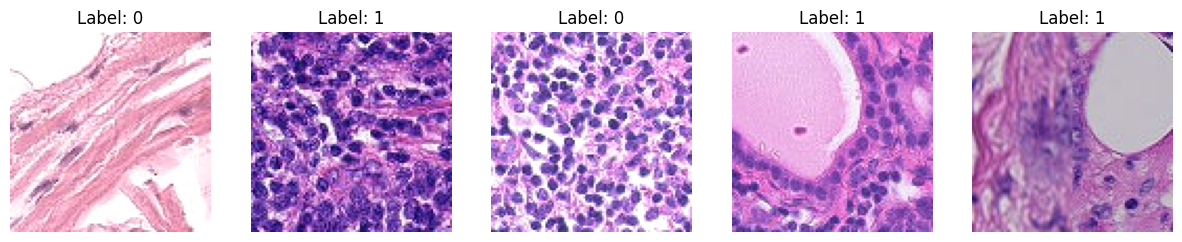

In [5]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Enable GPU memory growth to avoid runtime crashes
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PCam dataset with 80% train and 20% test split
(ds_train, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify dataset info
print(ds_info)

# Define preprocessing and augmentation functions
def preprocess(image, label):
    # Normalize images to [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize images to ensure consistent input size (if required by your models)
    image = tf.image.resize(image, [96, 96])
    return image, label

# Augmentation function according to PDM plan (rotation, flip, contrast)

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.clip_by_value(image, 0.0, 1.0)  # Ensure pixel values are within [0,1]
    return image, label

# Apply preprocessing, augmentation, batching, caching, and prefetching
batch_size = 64

# Training dataset pipeline
ds_train = (
    ds_train
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .map(augment, num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Test dataset pipeline (no augmentation, just preprocessing)
ds_test = (
    ds_test
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

# Check a batch of training images
for images, labels in ds_train.take(1):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load DenseNet121 model with pretrained weights (imagenet) and custom input shape
base_model = DenseNet121(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze base model layers to leverage pretrained features initially
base_model.trainable = False

# Define the complete model
model_densenet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_densenet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Model summary
model_densenet.summary()

# Train DenseNet-121 for 20 epochs
history_densenet = model_densenet.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 3, 3, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,038,529 (26.85 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1162s 351ms/step - accuracy: 0.8073 - auc: 0.8877 - loss: 0.4191 - val_accuracy: 0.8470 - val_auc: 0.9239 - val_loss: 0.3517
Epoch 2/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1044s 318ms/step - accuracy: 0.8427 - auc: 0.9205 - loss: 0.3588 - val_accuracy: 0.8408 - val_auc: 0.9262 - val_loss: 0.3607
Epoch 3/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1044s 319ms/step - accuracy: 0.8449 - auc: 0.9230 - loss: 0.3530 - val_accuracy: 0.8495 - val_auc: 0.9281 - val_loss: 0.3443
Epoch 4/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1045s 319ms/step - accuracy: 0.8465 - auc: 0.9242 - loss: 0.3503 - val_accuracy: 0.8523 - val_auc: 0.9292 - val_loss: 0.3398
Epoch 5/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1053s 321ms/step - accuracy: 0.8488 - auc: 0.9256 - loss: 0.3472 - val_accuracy: 0.8524 - val_auc: 0.9295 - val_loss: 0.3387
Epoch 6/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1050s 320ms/step - accuracy: 0.8480 - auc: 0.9258 - loss: 0.3466 - val_accuracy: 0.8509 - val_auc: 0.9301 - val_loss: 0.341

In [7]:
# Unfreeze all layers in the base model for fine-tuning
base_model.trainable = True

# Recompile model with a very low learning rate for stable fine-tuning
model_densenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Fine-tune the model for additional 10 epochs
history_finetune = model_densenet.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)


Epoch 1/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 3766s 1s/step - accuracy: 0.8337 - auc: 0.9105 - loss: 0.4164 - val_accuracy: 0.9116 - val_auc: 0.9666 - val_loss: 0.2399
Epoch 2/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 3631s 1s/step - accuracy: 0.9227 - auc: 0.9757 - loss: 0.1972 - val_accuracy: 0.9371 - val_auc: 0.9830 - val_loss: 0.1638
Epoch 3/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 3602s 1s/step - accuracy: 0.9475 - auc: 0.9870 - loss: 0.1415 - val_accuracy: 0.9454 - val_auc: 0.9864 - val_loss: 0.1452
Epoch 4/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 3559s 1s/step - accuracy: 0.9623 - auc: 0.9928 - loss: 0.1039 - val_accuracy: 0.9520 - val_auc: 0.9880 - val_loss: 0.1355
Epoch 5/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 3552s 1s/step - accuracy: 0.9732 - auc: 0.9961 - loss: 0.0753 - val_accuracy: 0.9507 - val_auc: 0.9871 - val_loss: 0.1488
Epoch 6/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 3548s 1s/step - accuracy: 0.9824 - auc: 0.9981 - loss: 0.0529 - val_accuracy: 0.9540 - val_auc: 0.9868 - val_loss: 0.1487
Epoch 7/10
3277/

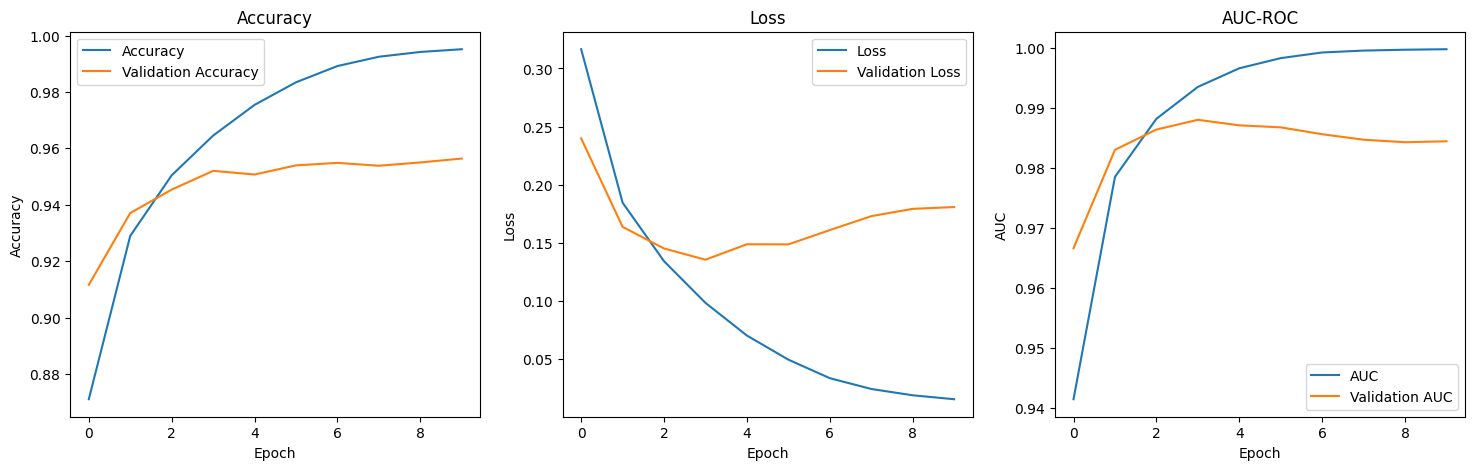

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
# Required imports for visualization and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Plot training curves after fine-tuning
def plot_training_curves(history):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('AUC-ROC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.show()

# Evaluate model performance on test data
def evaluate_model(model, dataset):
    y_true, y_pred = [], []
    for images, labels in dataset:
        predictions = model.predict(images)
        predictions = np.round(predictions).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions.flatten())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print("\nModel Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

# Run these functions after fine-tuning
plot_training_curves(history_finetune)
evaluate_model(model_densenet, ds_test)
